## <div class="cite2c-biblio"></div> Bank Institution Term Deposit Predictive Model

The Bank of Portugal  has a huge amount of data that includes customers profiles of those who have to subscribe to term deposits and the ones who did not subscribe to a term deposit. As their newly employed machine learning researcher, I want to come up with a robust predictive model that would help the bank identify customers who would or would not subscribe to their term deposit in the future.

Your main goal as a machine learning researcher is to carry out data exploration, data cleaning, feature extraction, and developing robust machine learning algorithms that would aid them in the department.

**Import all necessary packages for the work.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv("bank-additional-full.csv", sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Exploratory Data Analysis

I will be using Tableau, Seaborn and Matplotlib for the analysis to gain a robust insight into the relationship into the columns and inform my machine learning approach.

In [4]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
print("The data has {} rows with {} features/columns".format(data.shape[0], data.shape[1]))

The data has 41188 rows with 21 features/columns


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

#### Check if there are missing values in the data


In [7]:
print("The number of missing value(s): {}".format(data.isnull().sum().sum()))

The number of missing value(s): 0


In [8]:
data.select_dtypes(include=["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


From the data, we observe that the mean age is $40$ years with a maximum age of $98$ years and minimum age of $17$ years. The balance is the average yearly balance which is in euros. 

### Tableau

A story of the EDA can be found here to understand the data set: [Story Link](https://public.tableau.com/profile/lawal.ogunfowora#!/vizhome/Book2_15983808519460/Story1?publish=yes)

### Seaborn and Matplotlib

#### Univariate Analysis

In [9]:
def catplot(x,data):
    plot= sns.catplot(x, kind="count", data=data, palette="Set1")
    plt.xticks(rotation=45, horizontalalignment='right' )
    plt.title("counts"+ " "+ "of" + " "+ " " + x )
    return 

#### Target

First thing to cross check is to know if the target class is balanced or not.

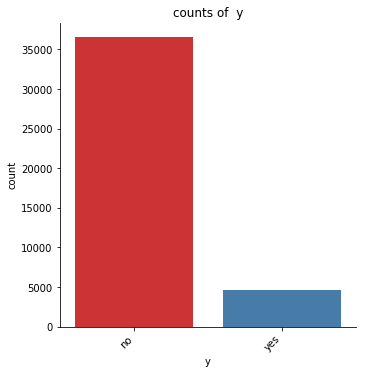

In [10]:
catplot("y",data=data)

There seems to be alot of more clients that have not subscribed to a term deposit.This is certainly a class imbalanced problem. Therefore, I will have to carry out class balancing before the model.




**Marital Status**

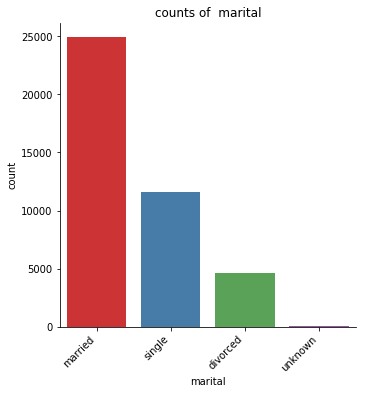

In [11]:
catplot("marital", data=data)

More of our customers (both potential and actual) are married, and this makes perfect logical sense as married couples would be more likely to want to make plans for their family's future.

**Education**

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Text(0.5, 0, 'education')

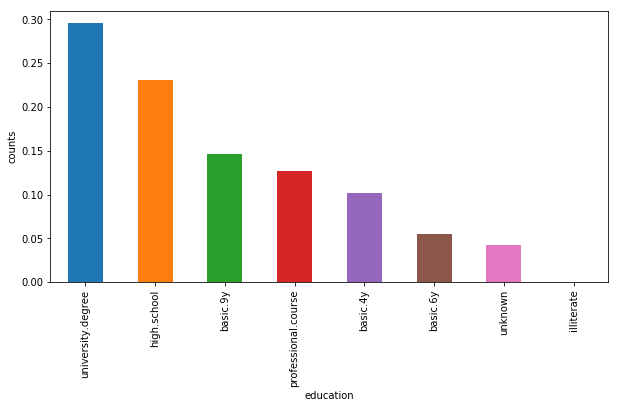

In [12]:
print(data['education'].value_counts())
plt.figure(figsize=(10,5))
data['education'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('education')

Basically, what the plot shows is that for anyone to, with significant probability, consider Term Deposit with the bank, they have to be educated as no illiterate is shown on the chart. Noteworthy is also the fact that the highest distribution is for those with University Degree.

**Job**

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Text(0.5, 0, 'job')

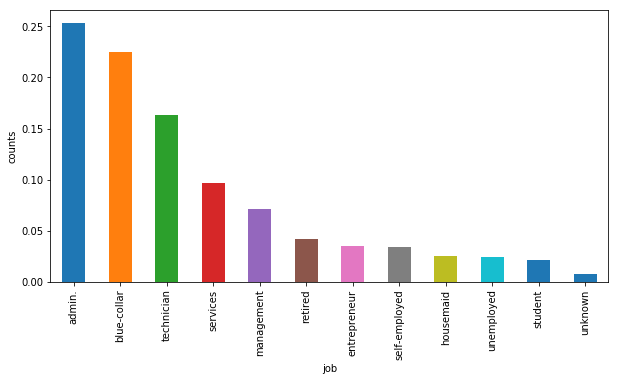

In [13]:
print(data['job'].value_counts())
plt.figure(figsize=(10,5))
data['job'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('job')

**Age Distribution**

Text(0.5, 1.0, 'Age Distribution')

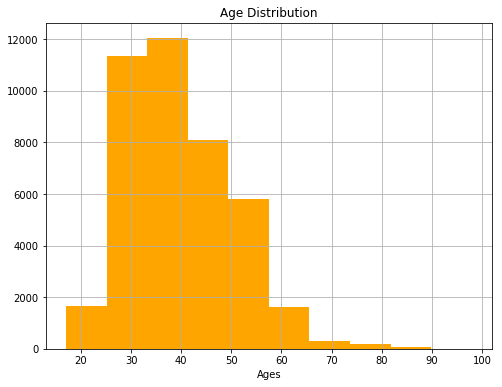

In [14]:
plt.figure(figsize=(8, 6))
data.age.hist( color="orange") 
plt.xlabel('Ages')
plt.title("Age Distribution")

The Mode of the age column is around 40 years. And just as the marital status column, this is quite expected for the sprt of service the bank offers.

### Bivariate Analysis

In [15]:
def boxplot(x, y, data=data, hue= "y"):
    plot = sns.boxplot(x= x, y=y, hue=hue, data= data)
    plt.xticks( rotation=45, horizontalalignment='right' )
    plt.title("Boxplot of " + " " + x.upper() + " " + "and "+ " " + y.upper())
    return plot

**Marital vs. age and target**

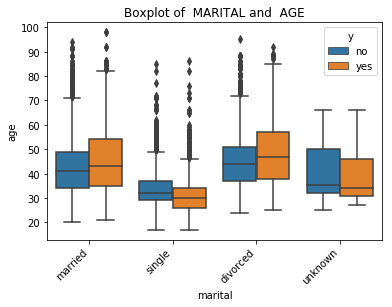

In [16]:
boxplot("marital", "age", data=data, hue= "y")

**Education vs. age and target**

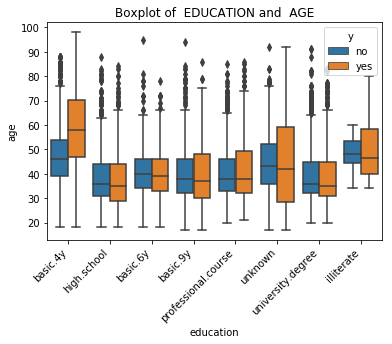

In [17]:
boxplot("education", "age", data=data, hue= "y")

**Correlation**

In [18]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In the correlation table, there are some variables that are strongly correlated some of which are:
* emp.var.rate and euribor3m
* emp.var.rate and nr.employed
* cons.price.idx and emp.var.rate
* empbor3m and nr.employed

This might come in handy when building the model.

### Data Preprocessing

**Hot Encoding for all Categorical Data**

In [19]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
# from sklearn.preprocessing import OneHotEncoder
def createDummies(data):
    df = pd.get_dummies(data=data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'day_of_week'])
    return df
df = createDummies(data)

In [21]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,1,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,1,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,1,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,1,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,1,0,0,0


In [22]:
df.shape

(41188, 64)

In [23]:
num_cols = ['emp.var.rate',"pdays","age", 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

In [24]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [25]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.533034,261,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,1,0,0,0
1,1.628993,149,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,1,0,0,0
2,-0.290186,226,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,1,0,0,0
3,-0.002309,151,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,1,0,0,0
4,1.533034,307,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,1,0,0,1,0,0,0


In [26]:
X = df.drop(columns=[ 'y', 'duration'])
y = df["y"]
print(X.shape)
print(y.shape)

(41188, 62)
(41188,)


In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [41]:
y = encoder.fit_transform(y)

In [29]:
X.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

### Split Data using sklearn  train test split

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(37069, 62)
(37069,)
(4119, 62)
(4119,)


### Machine Learning Model

**1.Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
# model_logreg = logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [43]:
# Balancing the dataset using SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)


X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

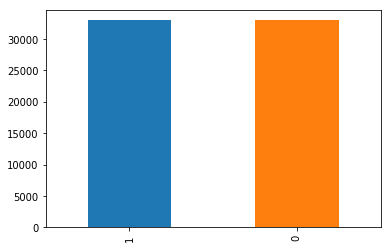

In [44]:
pd.Series(y_train_new).value_counts().plot.bar()

In [45]:
# fit the model
logreg.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = logreg.predict(X_train_new)

# prediction for Testing data
test_pred_sm = logreg.predict(X_test)

**Confusion Matrix**

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [36]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9315904536345418
Accuracy score for Testing Dataset =  0.8892935178441369


In [37]:
confusion_matrix = confusion_matrix(y_test, test_pred_sm)
confusion_matrix

array([[3517,   97],
       [ 359,  146]], dtype=int64)

**Intepretating Confusion Matrix**

1. Correct predictions: 3517 + 97 = 3614

2. Wrong Predictions: 359 + 146 = 505
  

**Classification Report**

In [38]:
print(classification_report(y_test, test_pred_sm))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      3614
         yes       0.60      0.29      0.39       505

    accuracy                           0.89      4119
   macro avg       0.75      0.63      0.66      4119
weighted avg       0.87      0.89      0.87      4119



**ROC Curve:**

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance

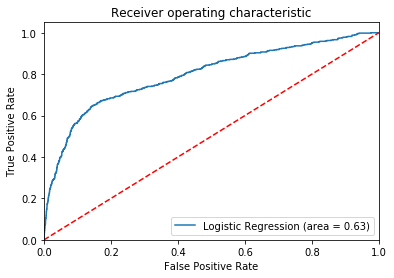

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#print("fpr{}, tpr{}". format(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**2. Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

In [ ]:
clf_decision = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_decision = clf_decision.fit(X_train, y_train)
y_pred = clf_decision.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred_sm))


**Important Features**

In [ ]:
import_decision= pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf_decision.feature_importances_}).\
                    sort_values('importance', ascending = False)

import_decision.head(4)

**Tree Plotting**

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image 

In [ ]:
df.columns

In [ ]:
feature_cols = ['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone',  'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed','campaign', 'pdays',
       'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

dot_data = StringIO()
export_graphviz(clf_decision, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Yes','No'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('term_deposit.png')
Image(graph.create_png())

### Try the following Models:

I intended to try the models below but I could not due to time constraint. I will continue on this project very soon


1. Multilayer Perceptron

2. Random Forest Classifier

3. Xgboost Classifier

4. Support Vector Machine (Try different kernel too rbf, linear and poly)

